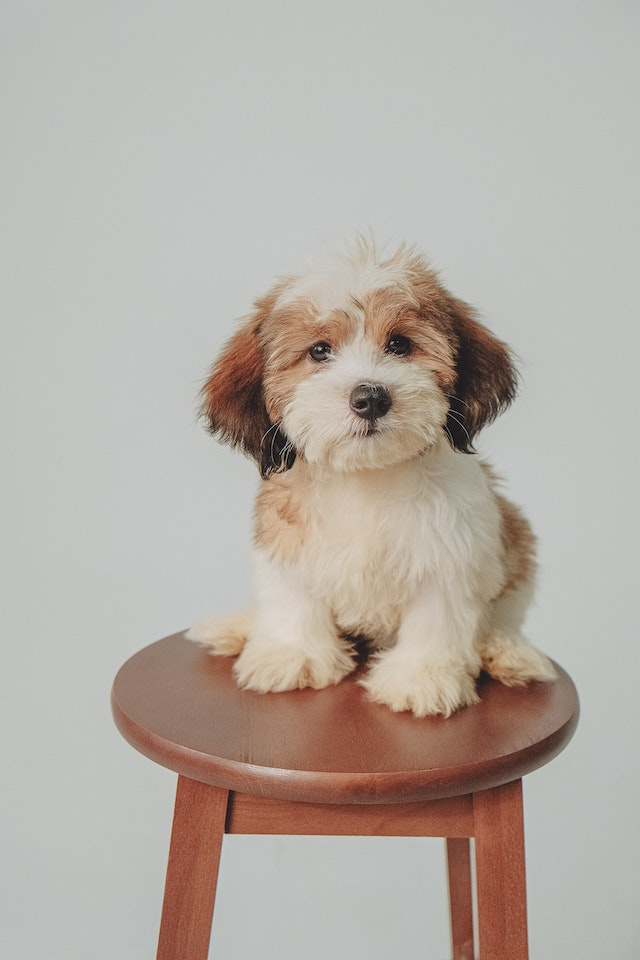

In [213]:
#!pip3 install pillow
import tkinter as tk 
from tkinter import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from calendar import timegm
#from time import strftime
import datetime
from rapidfuzz import fuzz, process
from PIL import Image
import csv
import os
duttontest = 'data\Dutton.csv'
puppy_profile_file = 'data\PuppyProfiles.csv'
DOB = ''

class puppy_project(tk.Tk):
    def __init__(self):
        super().__init__()

        self.geometry("500x500")
        self.title("Home Page")
        self.btnOpen=Button(self, text="Add New Pet", command=self.new_pet_page).pack(pady=10)
        self.btnOpen=Button(self, text="Dutton", command=self.entries_page).pack(pady=10)
        self.btnOpen=Button(self, text="Max", command=self.entries_page).pack(pady=10)
        self.btnOpen=Button(self, text="Oliver", command=self.entries_page).pack(pady=10)  

        # Create a Start Search Button and place it on the right (column 2)
        self.search_button = tk.Button(self, text="by Title", command=self.start_search_title)
        self.search_button.grid(row=0, column=2, padx=10, pady=10, sticky="ew")

        self.search_button = tk.Button(self, text="by Author", command=self.start_search_author)
        self.search_button.grid(row=0, column=3, padx=10, pady=10, sticky="ew")
            
    def new_pet_page(self):

        self.pet_page=Toplevel()
        self.pet_page.title("Adding a New Pet")
        #self.pet_page.geometry("500x500")
 
        self.pet_page.label = tk.Label(self.pet_page, text="Enter New Pet Details:", font=('Ariel', 10))
        self.pet_page.label.grid(row=0, column=0, padx=10, pady=10, sticky="e")
        self.pet_page.label.grid
       
        # Create a Label and place it on the left (column 0)
        #Label for Name:
        self.pet_page.label = tk.Label(self.pet_page, text="Pet's Name:") 
        self.pet_page.label.grid(row=1, column=0, padx=10, pady=10, sticky="e")
        self.pet_page.label.grid

        # Create an Entry Widget with a specific width (e.g., 30 characters)
        self.pet_page.entry = tk.Entry(self.pet_page, width=30) #entry = textbox single line for text
        self.pet_page.entry.grid(row=1, column=1, padx=10, pady=10, sticky="ew") 
       
        #Label for DOB:
        self.pet_page.label = tk.Label(self.pet_page, text="Date of Birth:")
        self.pet_page.label.grid(row=2, column=0, padx=10, pady=10, sticky="e")
        self.pet_page.label.grid

        # Create an Entry Widget with a specific width (e.g., 30 characters)
        self.pet_page.entry = tk.Entry(self.pet_page, width=30) #entry = textbox single line for text
        self.pet_page.entry.grid(row=2, column=1, padx=10, pady=10, sticky="ew")

        #Label for Breed:
        self.pet_page.label = tk.Label(self.pet_page, text="Pet's Breed:")
        self.pet_page.label.grid(row=3, column=0, padx=10, pady=10, sticky="e")
        self.pet_page.label.grid

        #Entry widget for Breed:
        self.pet_page.entry = tk.Entry(self.pet_page, width=30)
        self.pet_page.entry.grid(row=3, column=1, padx=10, pady=10, sticky="ew")

        #Label for Image:
        self.pet_page.label = tk.Label(self.pet_page, text="Upload Image:")
        self.pet_page.label.grid(row=4, column=0, padx=10, pady=10, sticky="e")
        self.pet_page.label.grid

        # Create button to upload image.
        self.pet_page.btnOpen=Button(self.pet_page, text="Upload Image")
        self.pet_page.btnOpen.grid(row=4, column=1, padx=10, pady=10, sticky="ew")


        # Create a Submit Button and place it on the right (column 2)
        self.pet_page.btnOpen=Button(self.pet_page, text="Submit", command=self.entries_page)
        self.pet_page.btnOpen.grid(row=5, column=3, padx=10, pady=10, sticky="ew")    

        #Buttons to Exit
        self.pet_page.buttonClose=Button(self.pet_page, text="Exit", command=self.pet_page.destroy)
        self.pet_page.buttonClose.grid(row=6, column=3, padx=10, pady=10, sticky="ew") 

        #Button to to back to home page
        self.pet_page.btnOpen=Button(self.pet_page, text="Go Home", command=self.entries_page)
        self.pet_page.btnOpen.grid(row=7, column=3, padx=10, pady=10, sticky="ew") 
  
    def entries_page(self):
        self.entries_page=Toplevel()
        self.entries_page.title("Entries for pet:")
        self.entries_page.geometry("800x800")

        #Area for Graph:
        self.entries_page.label = tk.Label(self.entries_page, text="Graph:", font=('Arial', 18))
        self.entries_page.label.grid(row=0, column=0, padx=10, pady=10, sticky="e")
        self.entries_page.label.grid
        # Create a Label and place it on the left (column 0)

        #textbox for user to type in text
        self.entries_page.label = tk.Entry(self.entries_page, font=('Arial', 16))
        self.entries_page.label.grid(row=8, column=8, padx=10, pady=10, sticky="e")
        self.entries_page.label.grid

        #Label for Profile:
        self.entries_page.label = tk.Label(self.entries_page, text="Profile Info:")
        self.entries_page.label.grid(row=1, column=8, padx=20, pady=20, sticky="e")
        self.entries_page.label.grid

        #Tiles for Previous records:
        self.entries_page.label = tk.Label(self.entries_page, text="Previous weight records: ")
        self.entries_page.label.grid(row=4, column=0, padx=10, pady=10, sticky="e")
        self.entries_page.label.grid

        #Display Previous records:
        self.entries_page.text_widget = tk.Text(self.entries_page, height=15, wrap="word") 
        self.entries_page.text_widget.grid(row=4, column=6, columnspan=4, padx=10, pady=10)

        # Create an Entry Widget with a specific width (e.g., 30 characters)
        self.entries_page.search_button = tk.Button(self.entries_page, text="Edit Profile:", width=2, command=self.new_pet_page)
        self.entries_page.search_button.grid(row=2, column=8, padx=10, pady=10, sticky="ew")  

        # Create a Go Back Button and place it on the right (column 2)
        self.entries_page.btnOpen = tk.Button(self.entries_page, text="Go Home:", command=self.new_pet_page)
        self.entries_page.btnOpen.grid(row=8, column=8, padx=5, pady=5, sticky="ew")    

        #Buttons to Exit
        self.entries_page.buttonClose=Button(self.entries_page, text="Exit", command=self.entries_page.destroy)
        self.entries_page.buttonClose.grid(row=10, column=8, padx=10, pady=10, sticky="ew") 

        # Create an Entry Widget with a specific width (e.g., 30 characters)
        self.entries_page.search_button = tk.Button(self.entries_page, text="Read Profile Test:", command=self.read_pet_file_from_csv)
        self.entries_page.search_button.grid(row=4, column=0, padx=10, pady=10, sticky="ew")  

        # Create an Entry Widget with a specific width (e.g., 30 characters)
        self.entries_page.btnOpen=Button(self.entries_page, text="Add new pet record:", command=self.add_weight_record)
        self.entries_page.btnOpen.grid(row=5, column=0, padx=10, pady=10, sticky="ew")       

    def add_weight_record(self):
        self.new_weight=Toplevel()
        self.new_weight.title("New Weight:")
        self.new_weight.geometry("500x500")

        self.new_weight.label = tk.Label(self.new_weight, text="Enter New Pet Details:", font=('Ariel', 10))
        self.new_weight.label.grid(row=0, column=0, padx=10, pady=10, sticky="e")
        self.new_weight.label.grid
        # Create a Label and place it on the left (column 0)
        #Label for Name:
        self.new_weight.label = tk.Label(self.new_weight, text="Date of Entry:") 
        self.new_weight.label.grid(row=1, column=0, padx=10, pady=10, sticky="e")
        self.new_weight.label.grid

        # Create an Entry Widget with a specific width (e.g., 30 characters)
        self.new_weight.entry = tk.Entry(self.new_weight, width=30) #entry = textbox single line for text
        self.new_weight.entry.grid(row=1, column=1, padx=10, pady=10, sticky="ew")

        #Label for DOB:
        self.new_weight.label = tk.Label(self.new_weight, text="Weight:")
        self.new_weight.label.grid(row=2, column=0, padx=10, pady=10, sticky="e")
        self.new_weight.label.grid

        # Create an Entry Widget with a specific width (e.g., 30 characters)
        self.new_weight.entry = tk.Entry(self.new_weight, width=30) #entry = textbox single line for text
        self.new_weight.entry.grid(row=2, column=1, padx=10, pady=10, sticky="ew")

        #Label for Image:
        self.new_weight.label = tk.Label(self.new_weight, text="Upload Image:")
        self.new_weight.label.grid(row=3, column=0, padx=10, pady=10, sticky="e")
        self.new_weight.label.grid

        # Create button to upload image.
        self.new_weight.btnOpen=Button(self.new_weight, text="Upload Image", command=self.entries_page)
        self.new_weight.btnOpen.grid(row=3, column=1, padx=10, pady=10, sticky="ew")

        #Label for Breed:
        self.new_weight.label = tk.Label(self.new_weight, text="Comments:")
        self.new_weight.label.grid(row=4, column=0, padx=10, pady=10, sticky="e")
        self.new_weight.label.grid

        #Entry widget for Breed:
        self.new_weight.entry = tk.Entry(self.new_weight, width=30)
        self.new_weight.entry.grid(row=4, column=1, padx=10, pady=10, sticky="ew")

        # Create a Go Back Button and place it on the right (column 2)
        self.new_weight.search_button = tk.Button(self.new_weight, text="Go Home:", command=self.my_homepage_function)
        self.new_weight.search_button.grid(row=8, column=8, padx=5, pady=5, sticky="ew")    

        #Buttons to Exit
        self.new_weight.buttonClose=Button(self.new_weight, text="Exit", command=self.destroy)
        self.new_weight.buttonClose.grid(row=6, column=3, padx=10, pady=10, sticky="ew")     
    
    #Read PetProfile csv file
    def read_profile_file(petProfileCSV=puppy_profile_file):

        df = pd.read_csv(petProfileCSV)
        
        return(df)

    #Read CSV file from puppy profile
    def read_pet_file_from_csv(): 

        
        #readFile = pd.read_csv(self.read_profile_file["csvFile"].loc[int(self.whichfile)])
        readFile = pd.read_csv(read_profile_file()["csvFile"].loc[int(whichfile())])
        return(readFile)

    #Read csv file path location from puppy profile
    def read_path_location_from_csv():

        pupCSVPath = read_profile_file()["csvFile"].loc[int(whichfile())]
        
        return(pupCSVPath)

    def whichfile():
        usersearch = input("Which profile would you like to review?")
        return int(usersearch)

    #Adds new row to file for new pet weight record
    def new_weight_record():
        csv_file = read_path_location_from_csv()

        input_date = input("Input Date: ")
        weight = input("Input weight: ")
        image = input("Select Image: ")
        comment = input("Input comment: ")
        # Define the user data as a list
        user_data = [input_date, weight, image, comment]

        try:
            # Open the CSV file in append mode
            with open(csv_file, mode='a', newline='') as csvfile:
                # Create a CSV writer
                writer = csv.writer(csvfile)
                
                # Write the user data to the CSV file
                writer.writerow(user_data)
                
            print("User data added successfully.")
        except Exception as e:
            print(f"An error occurred: {e}")

    #Adds a new pet to file.
    def add_new_pet(file=puppy_profile_file):
        
        pet_ID = input("Input PetID:")
        pet_name = input("Input Pet's Name: ")
        DOB = input("Input pet's Date of Birth: ")
        breed = input("Input Breed: ")
        image = input("Input Image: " )
        csvFile = write_new_csv_file(pet_name)
        # Define the user data as a list
        user_data = [pet_ID, pet_name, DOB, breed, image, csvFile]

        try:
            # Open the CSV file in append mode
            with open(file, mode='a', newline='') as csvfile:
                # Create a CSV writer
                writer = csv.writer(csvfile)
                
                # Write the user data to the CSV file
                writer.writerow(user_data)
                
            print("User data added successfully.")
        except Exception as e:
            print(f"An error occurred: {e}")

    #Prints out individual pet's row records, e.g. an entry for a day
    def print_indvidual_entry_record():
        
        df = read_pet_file_from_csv()
        userSearch = input("What record do you want to return?")
        r = df.loc[int(userSearch)]
        print(r, "\n")

    #Returns individual pet's weight records
    def print_weight_record_for_individual():

        df = read_pet_file_from_csv()
        userSearch = input("What weight do you wan to return?")

        r = df["Weight"].loc[int(userSearch)]
        #self.text_widget.insert("end", "found something \n\n")

        #weight = df["Weight"].loc[r]
        #print({weight})
        print(r)

    #Calculates age
    def getAge(): #DOB = '01/05/2023', , date_of_entry = '05/02/2023'
        """Calculate the age based on all of the Date fields from the PetRecord.csv file and compares to the DOB field from the pets.csv file."""

        #read dateofEntry for weight
        dr = read_pet_file_from_csv()
        r = input("What weight do you want?")
        date_of_entry = dr["DateofEntry"].loc[int(r)]
        print("Date of Entry selected: " + r)
        print({date_of_entry})  

        #read DOB from PetProfile
        df = read_profile_file()
        DOB = df["Date of Birth"].loc[int(r)]
        name = df["Pets Name"].loc[int(r)]
        print("Name:" + name)
        print({DOB}) 

        DOButc_time = time.strptime(DOB + ' 00:00:00', "%m/%d/%Y %H:%M:%S")
        DOBepoch_time = timegm(DOButc_time)

        DOEutc_time = time.strptime(date_of_entry + ' 00:00:00', "%m/%d/%Y %H:%M:%S")
        DOEepoch_time = timegm(DOEutc_time)

        #Print the age
        #Print(f"The person is "  + str(epoch_time) + " years old.")
        #print("UTC " + str(DOButc_time))
        #print("DOBepoch_time " + str(DOBepoch_time))
        #print("Month " + str(DOButc_time.tm_mon))
        #print("Day " + str(DOButc_time.tm_mday))
        #print("Year " + str(DOButc_time.tm_year))

        #Calculate the age
        age = DOEepoch_time - DOBepoch_time #Subtract the DateOfEntry = DateOfBirth
        #print("Age " + str(age))
        print("Days: " + str(age/(3600 * 24))) # ((60 seconds * 60 minutes) = 3600 * 24 hours)
        print("Months: " + str(age/(60 * 60 * 24 * 30))) # (60 seconds * 60 minutes * 24 hours * 30 days)
        print("Years: " + str(age/(3600 * 24 * 365))) # ((60 seconds * 60 minutes) = 3600 seconds * 24 hours * 365 days)

    #loads image for profile
    def get_puppy_profile_image():

        r = input("What image do you want?")
        pupImage = read_profile_file()["Profile Image"].loc[int(r)]
        # load and show images
        img = Image.open(pupImage)
        display(img) # in jupyter, the image is shown as output
        
        """
        r = input("What image do you want?")
        pupImage = read_profile_file()["Profile Image"].loc[int(r)]
        # load and show images
        img = Image.open(pupImage)
        display(img) # in jupyter, the image is shown as output
        """

    #loads image from pet's individual csv file.
    def get_individual_image():

        df = read_pet_file_from_csv()
        r = input("What image do you want?")
        pupImage = df["Image"].loc[int(r)]
        # load and show images
        img = Image.open(pupImage)
        display(img) # in jupyter, the image is shown as output   

        """    read_pet_file_from_csv()
        csv_file=petFile[fileIndex]
        df = pd.read_csv(csv_file)
        r = input("What image do you want?")
        pupImage = df["Image"].loc[int(r)]
        # load and show images
        img = Image.open(pupImage)
        display(img) # in jupyter, the image is shown as output """

    # gets dog's profile based on PetID.
    def get_uniquedogprofile():
        '''returns dog's profiles based on petID.'''
        
        df = read_profile_file()
        userSearch = input("What pet's profile do you want to see?")

        r = df.loc[int(userSearch)]
        print(r, "\n")

    def write_new_csv_file(pet_name): #create file
        # Get user input for the file name and data
        folder_path = 'data'
        #pet_name = input("Enter the name of the new pet: ")
        csv_file_name = pet_name+'.csv'
        # Combine the folder path and file name to create the full file path
        file_path = os.path.join(folder_path, csv_file_name)
        print(csv_file_name)

        # Data to be written to the CSV file
        data = [
            ['DateofEntry', 'Weight', 'Image', 'Comment']
        ]
        #Create csv file
        with open(file_path, 'w') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerows(data)
        return file_path
        
    # Delete file from profile file
    def delete_pet_row_from_file(file=puppy_profile_file):

        df = pd.read_csv(file)

        # Prompt the user for the criteria to identify the row to be deleted
        delete_pet_name = input("What to delete: ")

        #Delete the CSV file before deleting the row.
        csvFileToDelete = df["csvFile"].loc[int(delete_pet_name)]
        delete_csv_file(csvFileToDelete)

        # Filter the DataFrame to remove the row(s) matching the criteria
        df = df[df['PetID'] != int(delete_pet_name)]
        #Save the updated DataFrame back to the CSV file
        df.to_csv(file, index=False)

    # Delete row from weight file
    def delete_weight_row_from_file():
        csv_file = read_path_location_from_csv()
        df = pd.read_csv(csv_file)

        # Prompt the user for the criteria to identify the row to be deleted
        delete_weight = input("What Date Of Entry do you want to delete? ")

        # Filter the DataFrame to remove the row(s) matching the criteria
        df = df[df['DateofEntry'] != delete_weight]  #DateofEntry is the column to identify the row

        # Save the updated DataFrame back to the CSV file
        df.to_csv(csv_file, index=False)

        print(f"Row for {delete_weight} has been deleted from the CSV file.")   

    # Deletes csv file when pet is deleted
    def delete_csv_file(csv_file):
        #folder_path = 'data'
        #csv_file = read_path_location_from_csv()  # Replace with the path to your CSV file
        #csv_file = 'data/test.csv'
        # Check if the file exists before attempting to delete it
        if os.path.exists(csv_file):
            os.remove(csv_file)
            print(f"CSV file '{csv_file}' has been deleted.")
        else:
            print(f"CSV file '{csv_file}' does not exist.")

    #Plots csv file into plotly
    def plotcsv():
        '''Plots pet csv file based on PetID selected by user. '''
        # Read the CSV file into a DataFrame
        csv_file = read_pet_file_from_csv()

        # Extract X and Y data
        x = csv_file['DateofEntry']
        y = csv_file['Weight']

        # Create a basic line plot
        plt.plot(x, y)

        # Customize the plot (optional)
        plt.title('Weight Records')
        plt.xlabel('Date of Entry')
        plt.ylabel('Weight')

        # Display the plot (or save it to a file)
        plt.show()

#get_puppy_profile_image()
app=puppy_project()
app.mainloop() 

